In this project I will analize dataset from https://www.kaggle.com/lava18/google-play-store-apps. The purpose of it is to understand what kind of apps have biggest popularity. Research will help startups, investors, app developers to know probable expectations of number of users if they are going to create, invest in some app whic will be put in Google Playstore. Startups will be able to rise money if theyprovide meningful explanation to investors what is the future of app and investors will invest in apps which have postiential to grow, which are in tendencey in the market.

For my analyzes I will investigate what I have in my dataset, will work with missing data, convert my data into numerical values and fit into model for prediction. After all data cleaning and formatting is done we will also look at min, max, median, mean, skew, and kurtosis of the most relevant features in the dataset.
<br>
Finally Supervised Learning model will be used for my prediction- will use several classifiers to see which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from scipy.stats import kurtosis, skew

#Import scikit-learn metrics module for accuracy calculationfrom sklearn import metrics
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, make_scorer, fbeta_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.grid_search import GridSearchCV


%matplotlib inline

E:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Let's investigate the dataframe to understand what we have and how to treat it. It will also help us understand whether we are going to make corections in somecells or not, what columns we are going to use etc. I will also analize data in each column, to understand wich columns do I need for my model.

In [2]:
df =pd.read_csv('googleplaystore.csv')
print(('My Dataframe consists of {} rows and {} columns').format(df.shape[0], df.shape[1]))
df.head(2)

My Dataframe consists of 10841 rows and 13 columns


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


From datafrmae I see that generally column `App`, `Genres` include information which is summarized in column `Category`

In [3]:
print('Unique values in App column - ', df['App'].nunique())
print('Unique values in Genres column - ', df['Genres'].nunique())
print('Unique values in Category column - ', df['Category'].nunique())

Unique values in App column -  9660
Unique values in Genres column -  120
Unique values in Category column -  34


In [4]:
df['App'].unique()[:5]

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
       'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book'],
      dtype=object)

In [5]:
df['Genres'].unique()[:5]

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles'], dtype=object)

In [6]:
df['Category'].unique()[:5]

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS'], dtype=object)

As I see from abovementioned unique values from certain column `App` is name of ceratin app. `Genres` are too wide version of `Category` column. So will not take `APP` but will take two others

`Rating` column is too subjective, becouse if at some point app started to work badly, it's rating can drop. I'm more interested which kind of app have poplarity in the market, so I'm more interested in downloads. The same is with `Reviews`, `Content Rating`, `Current Version` and `Last Update`. These are data which are not telling anything connected with the popularity of an app. Becouse for example, one app can be updated 10 time becouse of bad quality (all the time some bugs are corrected) and another one is working quit good and no need of update is needed. Also these anr not kind of features that we can imput initially.

In [7]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

As I see column `Type` is just tell whether certain app for frr is for paid. I have that information also in column `Price`. So will take column `Price` instead

In [8]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Think `Android Ver` can play role, becouse if app is for newer version of Android it may not be possible to download for older version which will affect on number of downloads

In the datafrmae there is one row which missis one of the most important data for me `Category`, `Genres`. As I see it is only 1 row, so i can just drop it

In [9]:
df=df.drop([10472])

So will create new dataframe with the columns I need

In [10]:
df_new=df[['Installs', 'Category', 'Rating', 'Genres', 'Price', 'Size', 'Android Ver']]
#droping row which I don't need (discussed above)
#df_new=df_new[df['Installs']!='Free']
df_new.head()

,Installs,Category,Rating,Genres,Price,Size,Android Ver
0,"10,000+",ART_AND_DESIGN,4.1,Art & Design,0,19M,4.0.3 and up
1,"500,000+",ART_AND_DESIGN,3.9,Art & Design;Pretend Play,0,14M,4.0.3 and up
2,"5,000,000+",ART_AND_DESIGN,4.7,Art & Design,0,8.7M,4.0.3 and up
3,"50,000,000+",ART_AND_DESIGN,4.5,Art & Design,0,25M,4.2 and up
4,"100,000+",ART_AND_DESIGN,4.3,Art & Design;Creativity,0,2.8M,4.4 and up


In [11]:
print(('My Filtered dataframe consists of {} rows and {} columns').format(df_new.shape[0], df_new.shape[1]))
df_new.info()

My Filtered dataframe consists of 10840 rows and 7 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 7 columns):
Installs       10840 non-null object
Category       10840 non-null object
Rating         9366 non-null float64
Genres         10840 non-null object
Price          10840 non-null object
Size           10840 non-null object
Android Ver    10838 non-null object
dtypes: float64(1), object(6)
memory usage: 677.5+ KB


In [12]:
df_new.isnull().sum()

Installs          0
Category          0
Rating         1474
Genres            0
Price             0
Size              0
Android Ver       2
dtype: int64

From abovementioned data I can see that only `Android Ver` column has missing data so will fill it with the `mod` of the column

In [13]:
df_new['Android Ver'].fillna(df_new['Android Ver'].mode()[0], inplace=True)

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


So as we get rid of empty cells in dataframe it is time to make all necessary corrections before model will be executed. Before making some analyzes based on dataset, it is important to cleane, bring data into proper view and after that work on it

In [16]:
df_new['Installs'][:5]

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

I want to convert `df_new['Installs']` into numerical value as planning to use it in my analyzes. Also I don't need `+` and `,` signs there. It will not play role in my analyzes just will disturb numbers

In [17]:
df_new['Installs']=df_new['Installs'].str.replace('+', '')
df_new['Installs']=df_new['Installs'].str.replace(',', '')
df_new['Installs']=df_new['Installs'].astype('int')

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [18]:
unique_elements, counts_elements = np.unique(df_new['Installs'], return_counts=True)
uniques={}
i=0
for elem in unique_elements:
    uniques[elem]=counts_elements[i]
    i+=1
uniques

{0: 15,
 1: 67,
 5: 82,
 10: 386,
 50: 205,
 100: 719,
 500: 330,
 1000: 907,
 5000: 477,
 10000: 1054,
 50000: 479,
 100000: 1169,
 500000: 539,
 1000000: 1579,
 5000000: 752,
 10000000: 1252,
 50000000: 289,
 100000000: 409,
 500000000: 72,
 1000000000: 58}

Let's see it also graphically

In [19]:
downloads_df=pd.DataFrame({'Downloads':unique_elements, 'Times':counts_elements})
downloads_df['Downloads']=downloads_df['Downloads'].astype(str)
downloads_df.head()

,Downloads,Times
0,0,15
1,1,67
2,5,82
3,10,386
4,50,205


In [20]:
def plot_two_cols(df, col1, col2, size1, size2):
    '''
    INPUT
    df - dataframe
    col1 - name of column which need to be plotted
    col2 - name of column which need to be plotted
    size1, size2 - size of the ploth
    
    OUTPUT
    
    Creates plot from col1 and col2
    
    '''
    
    fig = plt.figure(figsize = (size1, size2))
    plt.bar(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation='vertical')
    return plt.show();

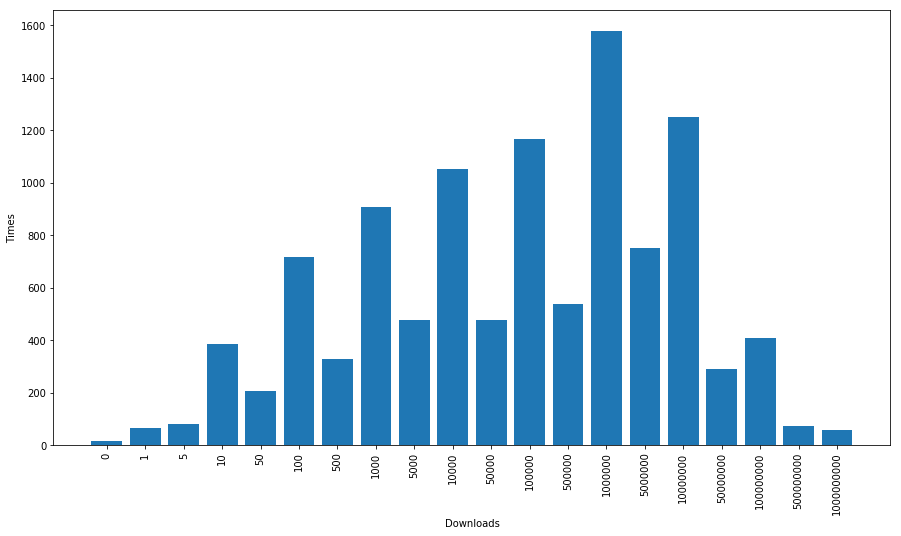

In [21]:
plot_two_cols(downloads_df, 'Downloads', 'Times', 15, 8)

As it can bee seena also from above graph most of applications have more then 1 mln downloads. Second ones are those which have 10 mln downloads

Lets analize `Price` column

In [22]:
df_new['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Need to convert it into numbers

Lest see `Genres`

In [23]:
df_new['Genres'].unique()[:10]

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity'], dtype=object)

I will later do one hot encoding for this one

In [24]:
df_new['Price']=df_new['Price'].str.replace('$','')
df_new['Price']=df_new['Price'].astype(float)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Lets analize `Size` column

In [25]:
df_new['Size'].tail(10)

10831                  9.8M
10832                  582k
10833                  619k
10834                  2.6M
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

So to convert all of them to normal number will convert all of them to megabytes, thats why will delete M and all those wich are with kilobytes, will devide that ones into 1000.   So as I see there are apps with M - Megabytes, K-kilobytes and 1000+ which is about 1M. So what I will do will convert all of them to Megabytes i.e will get rid of M, so numbers will become megabyte, will make + as K nad everything wich has K letter at the end will delete K and devide that numbers into 1000 so all of them will become Megabytes. Also there is cells with text `Varies with device` which I will fill with mean of the column

Need to convert them into normal numbers. 

In [26]:
df_new['Size']=df_new['Size'].str.replace('+', '')
df_new['Size']=df_new['Size'].str.replace('M', '')
df_new['Size']=df_new['Size'].str.replace(',', '')
df_new['Size']=df_new['Size'].replace('Varies with device', 0)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [27]:
k_index=df_new[df_new['Size'].astype(str).str[-1]=='k'].index
for i in range(len(k_index)):
    df_new['Size'][k_index[i]]=float(df_new['Size'][k_index[i]][:-1])/1000
    

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df_new['Size']=df_new['Size'].astype(float)
df_new['Size']=df_new['Size'].replace(0, df_new['Size'].mean())

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now will investigate `Android Version` column

In [29]:
df_new['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [30]:
df_new['Android Ver']=df_new['Android Ver'].str.replace('and up', '')
df_new['Android Ver']=df_new['Android Ver'].str.replace(' ', '')
df_new['Android Ver']=df_new['Android Ver'].str.replace('W', '')
df_new['Android Ver']=df_new['Android Ver'].replace('Varieswithdevice', df_new['Android Ver'].mode())

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

Will take only first 3 digits as an Android Version becouse mainly 4rd digit in and update of certain version

In [31]:
df_new['Android Ver']=df_new['Android Ver'].astype(str).str[:3]

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now it is finally time to see what is behind `Category` column

In [32]:
df_new['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

As I see the column looks good. Just when will fit into model to make prediction, will convert it into dummy variables

In [33]:
group_Cat=df_new.groupby('Category')['Installs'].sum()
group_Cat

Category
ART_AND_DESIGN         1.243381e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.921470e+09
BUSINESS               1.001915e+09
COMICS                 5.608615e+07
COMMUNICATION          3.264728e+10
DATING                 2.643108e+08
EDUCATION              8.714520e+08
ENTERTAINMENT          2.869160e+09
EVENTS                 1.597316e+07
FAMILY                 1.025826e+10
FINANCE                8.766487e+08
FOOD_AND_DRINK         2.738988e+08
GAME                   3.508602e+10
HEALTH_AND_FITNESS     1.583073e+09
HOUSE_AND_HOME         1.687125e+08
LIBRARIES_AND_DEMO     6.299591e+07
LIFESTYLE              5.376435e+08
MAPS_AND_NAVIGATION    7.242819e+08
MEDICAL                5.325744e+07
NEWS_AND_MAGAZINES     7.496318e+09
PARENTING              3.152111e+07
PERSONALIZATION        2.325495e+09
PHOTOGRAPHY            1.008825e+10
PRODUCTIVITY           1.417609e+10
SHOPPING               3.247849e+09
SOCIAL             

I want also to see what Categories are more popular, which ones have more downloads

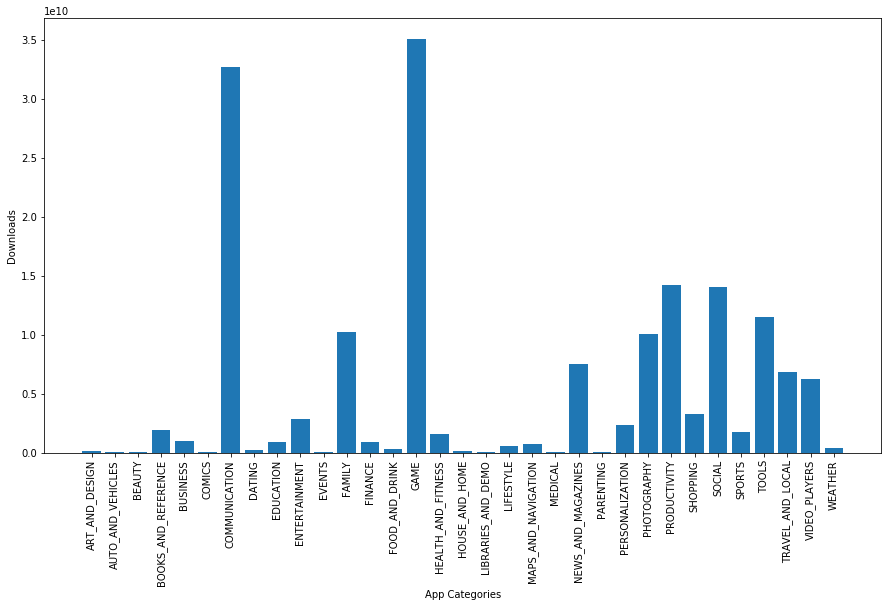

In [34]:
my_Categories=pd.DataFrame({'App Categories':group_Cat.index, 'Downloads':group_Cat.values})
plot_two_cols(my_Categories, 'App Categories', 'Downloads', 15, 8)

As it can clearly be seen from the graph, most popular apps are `Games` and after that `Communication`. All other are much more less.

Lets little bit more analyze these two kinde of apps.
<br>
Firs of all `Games`

In [35]:
df['Installs']=df_new['Installs']
game_Category=df[df['Category']=='GAME']
grouped_Category=game_Category.groupby('Genres')['Installs'].sum()

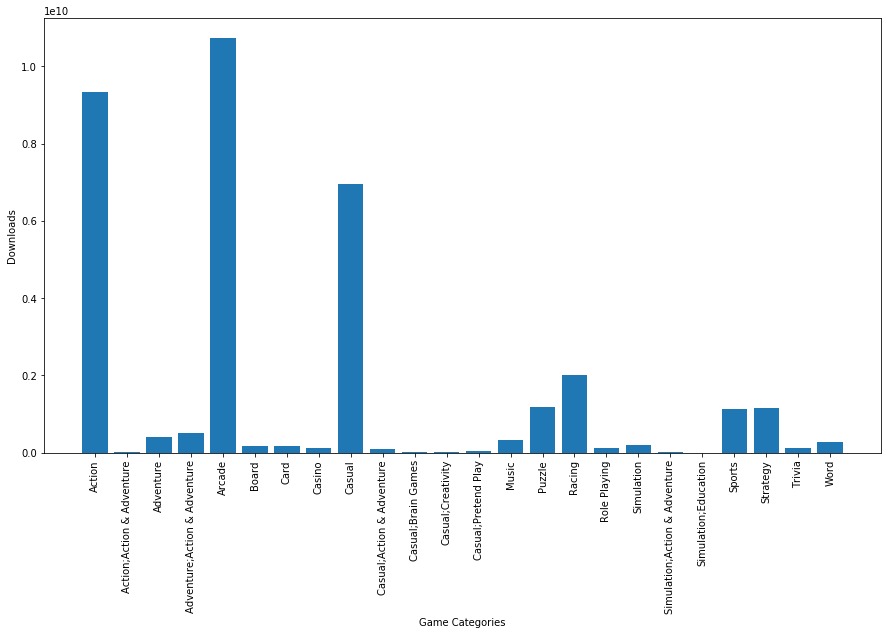

In [36]:
my_Games=pd.DataFrame({'Game Categories':grouped_Category.index, 'Downloads':grouped_Category.values})
plot_two_cols(my_Games, 'Game Categories', 'Downloads', 15, 8)

As it can be seen most popular Games are Arcade, then Action and Casual. All other have very small proportions.

Now will do the same for `Communication` column to see what is behind

In [37]:
comm_Category=df[df['Category']=='COMMUNICATION']
grouped_Communic=comm_Category.groupby('Genres')['Installs'].sum()
grouped_Communic

Genres
Communication    3.264728e+10
Name: Installs, dtype: float64

As it can be seen under `Genres` it is again Communication, so there is no more information for that one.

Also lets see whether there are any connection between colums. For that purpose I will use heatmap

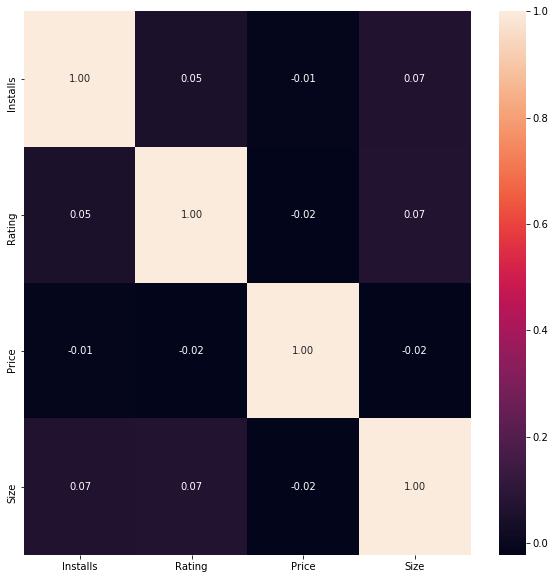

In [38]:
def create_heatmap(dataframe, size):
    '''
    INPUT
    
    dataframe - name of dataframe for which you need to create heatmap
    size - size of heatmap you want to see
    
    OUTPUT
    creates dataframe
    
    '''
    fig, ax = plt.subplots(figsize=(size,size))
    return sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', ax=ax);

create_heatmap(df_new, 10)

I see that there is almost no connection between colums. The reason may be becouse some colums are just information about version, so they ar not like stocks which prices rises and go down based on condition of another stocks/bonds

Before puting my dataset into any model, I neet to convert them into numbers or do one hot encoding. So lets see which ones are numbers and which one not.

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 7 columns):
Installs       10840 non-null int32
Category       10840 non-null object
Rating         9366 non-null float64
Genres         10840 non-null object
Price          10840 non-null float64
Size           10840 non-null float64
Android Ver    10840 non-null object
dtypes: float64(3), int32(1), object(3)
memory usage: 955.2+ KB


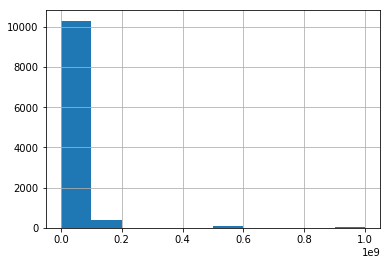

In [40]:
df_new['Installs'].hist()

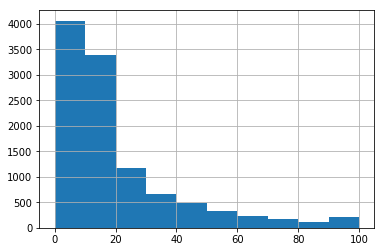

In [41]:
df_new['Size'].hist()

Lets look at some descriptives of some of the most relevant features in the dataset. Such as the min, max, median, mean, skew, and kurtosis. I will do calculations for Installs, Price, Size becouse others are categorical variables.

In [42]:
df_new[['Installs', 'Price', 'Size']].describe()

,Installs,Price,Size
count,1.084000e+04,10840.000000,10840.000000
mean,1.546434e+07,1.027368,20.990448
std,8.502936e+07,15.949703,20.783452
min,0.000000e+00,0.000000,0.008500
25%,1.000000e+03,0.000000,5.900000
50%,1.000000e+05,0.000000,18.000000
75%,5.000000e+06,0.000000,26.000000
max,1.000000e+09,400.000000,100.000000


I will define a function not to do write the same syntax over and over again.

In [43]:
def metrics(colName):
    '''
    INPUT
    
    colName - name of column for whcih metrics will be calculated
        
    OUTPUT
    calculate mean, median, mod of column print it and also shows in the graph
    
    '''
    mean=df_new[colName].mean()
    median=df_new[colName].median()
    mode=df_new[colName].mode()
    kurtos=kurtosis(df_new[colName])
    skewness = skew(df_new[colName])

    print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0],'\nKurtosis: ',kurtos,'\nSkewness: ',skewness)
    plt.figure(figsize=(10,5))
    plt.hist(df_new[colName],bins=20,color='orange')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.xlabel(colName)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Mean:  15464338.882564576 
Median:  100000.0 
Mode:  1000000 
Kurtosis:  100.23320390168583 
Skewness:  9.57074215602981


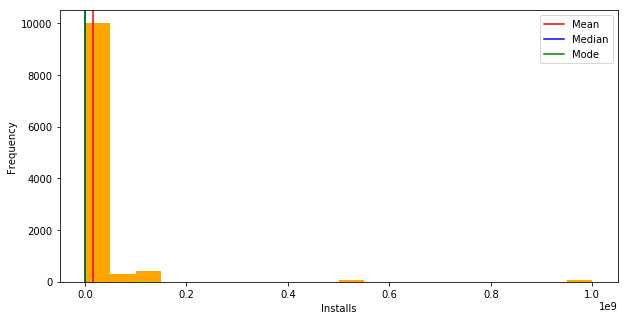

In [44]:
metrics('Installs')

As I see from above graph and calculated numbers Mean is much more bigger then Median and Mode. Its mean that there is/are some big numbers which is/are affecting on calulations. In this case we have Positive Skew its mean that the right hand size of the graph is longer than the tail on the left-hand side. Kurtois is showing peakiness of the curve and in this case it is to high.

Mean:  1.027368081180801 
Median:  0.0 
Mode:  0.0 
Kurtosis:  577.8758081867102 
Skewness:  23.70411171037595


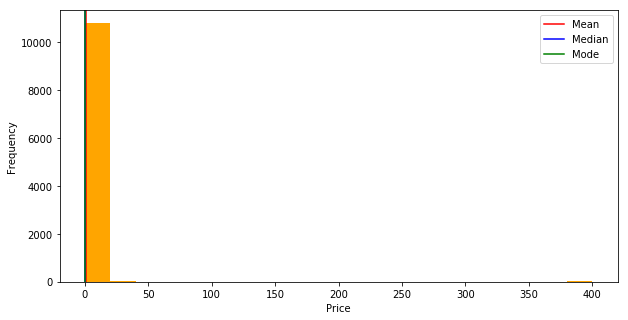

In [45]:
metrics('Price')

For Price it can be seen that mean, mode and median are almost the same. The same is also Skewness. If Skewness had valuse  we would have normal distribution, however it is not the case for this one. As number of Skew is greater than  so we are dealing with highly Skewed data. Kurtosis here is again big. In normal case it should be 3.

Mean:  20.99044798237235 
Median:  18.0 
Mode:  18.15209063653129 
Kurtosis:  2.9685385489950207 
Skewness:  1.761806109121836


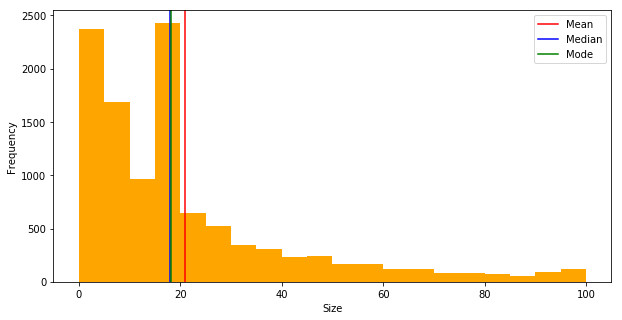

In [46]:
metrics('Size')

 it is not as Skwed as is again bigger than Mode so I'm dealing with Postive Skew (Right handed). But as Skew is not as skewed as Price. Also we can Se tah Kurtosis is closer to 3 and 3 is a sign of having normal distributed curve.

In [47]:
#doing one hot encoding in 1 row for Categories
categories=df_new['Category'].unique()
for i in range(len(categories)):
    df_new['Category']=df_new['Category'].replace(categories[i],i)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
#doing one hot encoding in 1 row for Android Ver
andr_ver=df_new['Android Ver'].unique()
for i in range(len(andr_ver)):
    df_new['Android Ver']=df_new['Android Ver'].replace(andr_ver[i],i)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
#doing one hot encoding in 1 row for Genres
app_gen=df_new['Genres'].unique()
for i in range(len(app_gen)):
    df_new['Genres']=df_new['Genres'].replace(app_gen[i],i)

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


So as we can see now all my column are numeric so can start fitting them into model

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 7 columns):
Installs       10840 non-null int32
Category       10840 non-null int64
Rating         9366 non-null float64
Genres         10840 non-null int64
Price          10840 non-null float64
Size           10840 non-null float64
Android Ver    10840 non-null int64
dtypes: float64(3), int32(1), int64(3)
memory usage: 955.2 KB


As I see there are missing values in Rating column

In [51]:
df_new[df_new['Rating'].isnull()].head(2)

,Installs,Category,Rating,Genres,Price,Size,Android Ver
23,100000,0,NaN,3,0.0,7.0,5
113,100000,2,NaN,5,0.0,5.7,4


In [52]:
# for each in df_new[df_new['Rating'].isnull()]['Genres']:
#     df_new[df_new['Rating'].isnull()]=df_new[df_new['Rating'].isnull()].fillna(df_new[df_new['Genres']==each]['Rating'].mean())

Will fill cells with missing values with the mean of the column

In [53]:
df_new['Rating'].fillna(df_new['Rating'].mean(), inplace=True)

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Now I will use one of the Supervised learning techniques to predict application downloads based on df_new

Also for measuring correctnes of my model I will use some metrics.
<br>
Metrics will be:
<br>
<b>Model score</b> - which will show howwell is my model doing on the dataset that it has already seen
<br>
<b>Accuracy</b> - which will show the ratio of correct answers to total ones.
<br>
<b>f1 score</b> - sometimes Accuracy can in reality show very high results or very low wrongly . To be sure that there is no such situation will also calculate f1 score where 0 is bad and 1 is good


In [54]:
X=df_new.iloc[:,1:]
y=df_new.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
from sklearn import metrics

model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.001, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))
print('Score on training ', round(model.score(X_train, y_train), 2))
print("F1 score is ", f1_score(y_test, y_pred, average='weighted'))
print("R2 score ", r2_score(y_test, y_pred))

Accuracy: 0.19
Score on training  0.18
F1 score is  0.09185940440245031
R2 score  0.9999999757395484


E:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Lets improve scores

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
# Assign the features to the variable X, and the labels to the variable y. 
X=df_new.iloc[:,1:]
y=df_new.iloc[:,0]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)
# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)

print('Score on training ', round(model.score(X_train, y_train), 2))
print('Accuracy is ', acc)
print("F1 score is ", f1_score(y_test, y_pred, average='weighted'))
print("R2 score ", r2_score(y_test, y_pred))

Score on training  0.94
Accuracy is  0.2523985239852399
F1 score is  0.25239919446523235
R2 score  0.9999999969268121


As it can be seen on training it is doing well enoug but accuracy is low. Its mean that I'm dealing with the situation of overfitting.

Lets also look at other Supervised learning techniques to see which one is performing better

In [59]:
training_data = X_train

testing_data = X_test

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=1000)
rf_mod = RandomForestClassifier(n_estimators=1000)
svm_mod = SVC()

In [60]:
naive_bayes.fit(training_data, y_train)
preds_nb = naive_bayes.predict(testing_data)
acc = accuracy_score(y_test, preds_nb)
print('Naive Bayes Accuracy of is ', acc)
print("Naive Bayes F1 score is ", f1_score(y_test, preds_nb, average='weighted'))
print("Naive Bayes R2 score ", r2_score(y_test, preds_nb))

print("\n")

bag_mod.fit(training_data, y_train)
preds_bag = bag_mod.predict(testing_data)
acc = accuracy_score(y_test, preds_bag)
print('Bagging Classifier Accuracy is ', acc)
print("Bagging Classifier F1 score is ", f1_score(y_test, preds_bag, average='weighted'))
print("Bagging Classifier R2 score ", r2_score(y_test, preds_bag))

print("\n")

rf_mod.fit(training_data, y_train)
preds_rf = rf_mod.predict(testing_data)
acc = accuracy_score(y_test, preds_rf)
print('RandomForestClassifier Accuracy is ', acc)
print("RandomForestClassifier F1 score is ", f1_score(y_test, preds_rf, average='weighted'))
print("RandomForestClassifierr R2 score ", r2_score(y_test, preds_rf))

print("\n")

svm_mod.fit(training_data, y_train)
preds_svm = svm_mod.predict(testing_data)
acc = accuracy_score(y_test, preds_svm)
print('SVCAccuracy is ', acc)
print("SVC F1 score is ", f1_score(y_test, preds_svm, average='weighted'))
print("SVC RandomForestClassifierr R2 score ", r2_score(y_test, preds_svm))

Naive Bayes Accuracy of is  0.07527675276752767
Naive Bayes F1 score is  0.06419491373171962
Naive Bayes R2 score  1.0000000198791965




E:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Bagging Classifier Accuracy is  0.2896678966789668
Bagging Classifier F1 score is  0.28387815550259327
Bagging Classifier R2 score  0.9999999953725056


RandomForestClassifier Accuracy is  0.2948339483394834
RandomForestClassifier F1 score is  0.2884268526883939
RandomForestClassifierr R2 score  0.9999999955993933


SVCAccuracy is  0.22878228782287824
SVC F1 score is  0.20324675331459308
SVC RandomForestClassifierr R2 score  0.9999999971256631


E:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Based on all scores for all Models that I have used the highest results returned RandomForestClassifier. What it do - it devides into different separate brances and do separate separation - for example in first branc it checkes wheter category, later it has separate brances for categories and its instalss. So in second branc it check how many installs do certain app have which was selected in first branc etc. This performed better then DecisionTreeClassifier becouse usually decision tres has such issue thet they use to overfit, whci was also in my case.

Now will use GridSearchCV to see which parameters return best results for RandomForestClassifier

In [64]:
# rfc=RandomForestClassifier(random_state=42)

# #random parametres from where best ones will be selected
# param_grid = { 
#     'n_estimators': [500, 800, 1500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,6,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [63]:
# #to see best parametres
# CV_rfc.best_params_

As it can be seen the highest score that was  able to get is 28.8%. One of thereasons thet it is low is lack of data colums. To increase it in prcatice will be needed to gather as much data as possible and start to test models on them.